In [32]:
!pwd

/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/driving


In [1]:
#python3

'''
I do believe this code works!! And this should be the formulation that is finally used...but this comment 
needs to be checked. 08/09/21 --A.R. 


'''


#import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time
import os
from auxiliary_functions import *


#set user defined parameters

L = 6 #size of domain to plot

#start timing
t0 = time.time()

#import data files
dat_field = np.loadtxt('data.txt') #x,y position data for herd and dogs
#dat_field = np.loadtxt('driving_data_SIVid.txt') #x,y position data for herd and dogs

#load info from parameter file
driving_on, x_target, y_target, vs, vd, ls, ld, fence, num_particles, ndogs, modder = load_params_auto('params.txt')

#load info from data file
xpart, ypart, thetapart, x_dogs, y_dogs, dat_times, timesteps, times, = load_data(dat_field, num_particles)


#sanity checks
sanity_checks(dat_field, num_particles, ndogs, timesteps)


Looking at data & performing sanity checks...
There are  200 sheep!
There are  1 dogs!
There are 1496 frames of dumped data!


In [15]:
import seaborn as sns
sns.set()

calc_theta = np.zeros(timesteps)


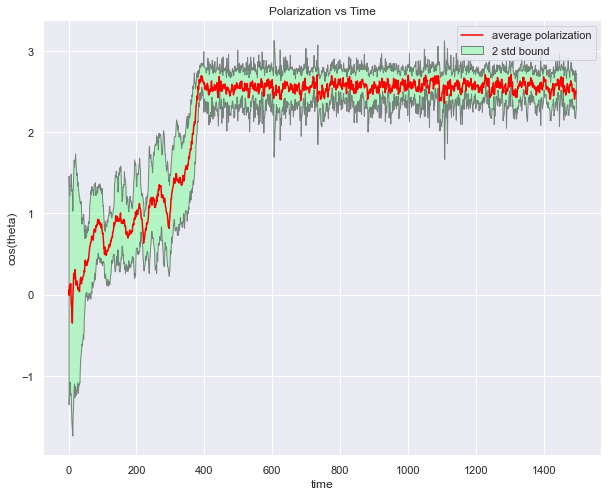

In [31]:
avg_polarization_1 = np.ones(timesteps)
std_polarization_1 = np.ones(timesteps)
modder = 1

counterr = 0
for t in range(timesteps):
#for t in range(10):

#fork here
#for t in range(0,100):
    if t%modder == 0:
        counterr +=1
        
        #download particle data
        index = num_particles*t
        tmp_x = xpart[index: index+num_particles]
        tmp_y = ypart[index: index+num_particles]
        tmp_theta = thetapart[index: index+num_particles]
        
        
        #calculate the angle between the target and the dog (ONLY FOR 1 DOG)
        tmp_target_angle = np.arctan2(y_target-y_dogs[index,0], x_target-x_dogs[index,0])
        # set color info
        tmp_colors = (tmp_theta - tmp_target_angle)%(2*np.pi) #colorator(tmp_theta)
        
        avg_polarization_1[t] = np.average(tmp_theta) #np.average(np.cos(tmp_theta)) #np.average(tmp_colors) #np.average(tmp_theta)
        std_polarization_1[t] = np.std(np.cos(tmp_theta))


error_up = avg_polarization_1 + 2.0*std_polarization_1
error_down = avg_polarization_1 - 2.0*std_polarization_1
        
plt.figure(figsize = (10,8))
plt.title("Polarization vs Time")
plt.ylabel("cos(theta)")
plt.xlabel("time")
# plt.plot(times, error_up)
# plt.plot(times, error_down)
plt.fill_between(times, error_down, error_up, alpha=0.5, edgecolor='k', facecolor='#7EFF99', label = '2 std bound')
plt.plot(times, avg_polarization_1, 'red', label = 'average polarization')
plt.legend()
plt.show()

In [23]:
np.shape(dat_field)

(3154300, 7)

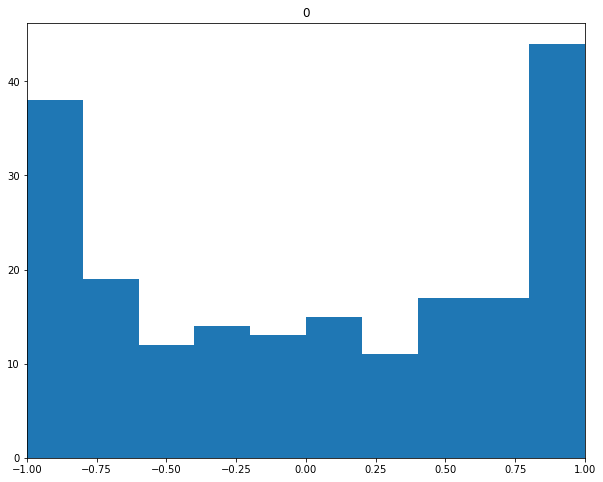

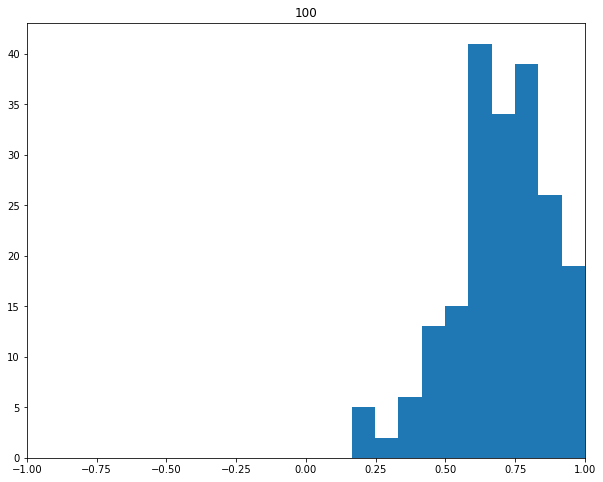

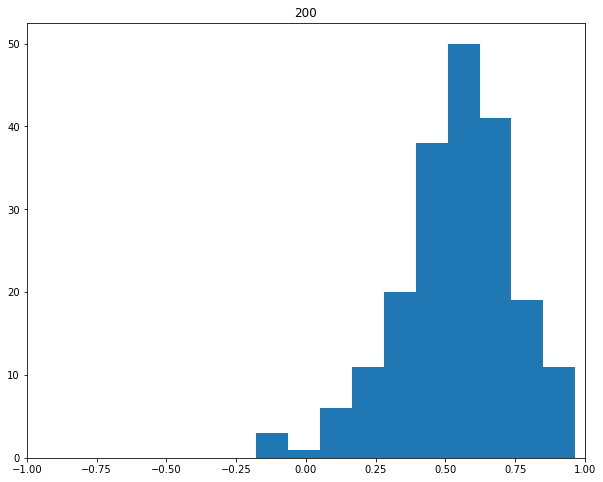

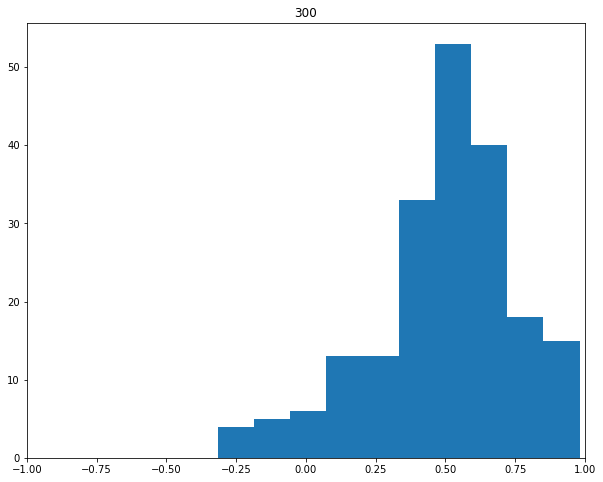

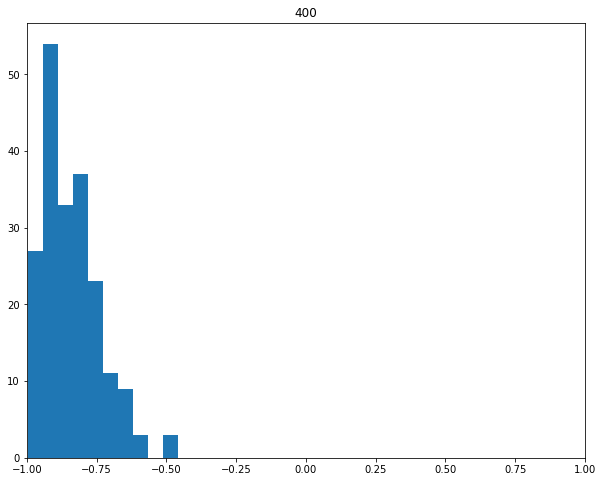

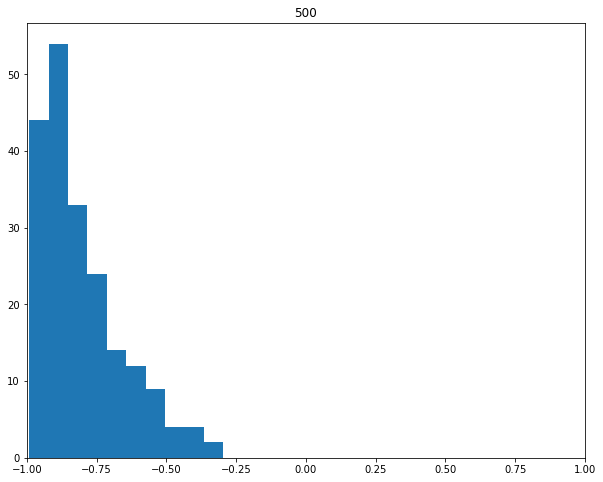

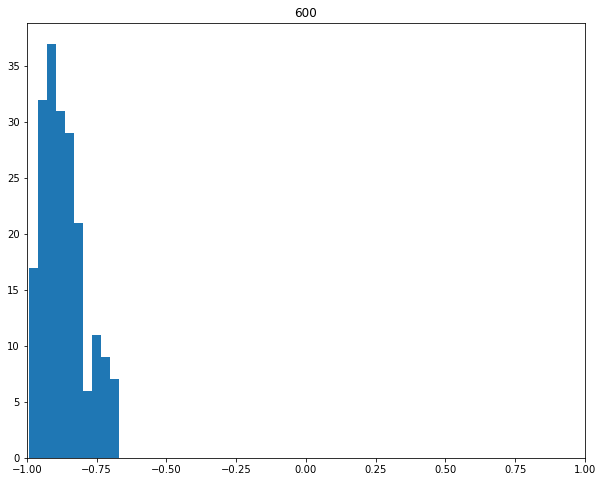

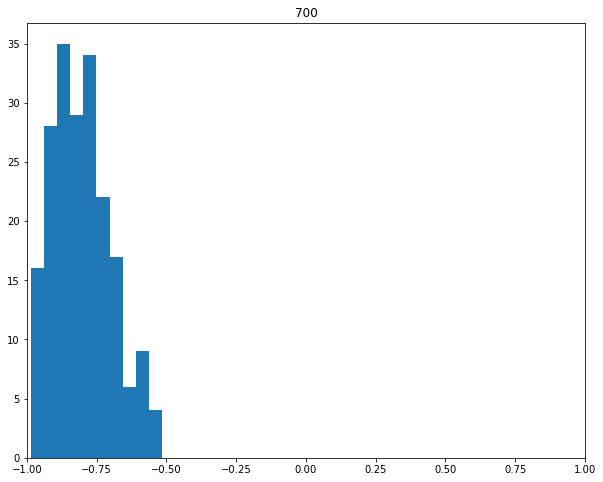

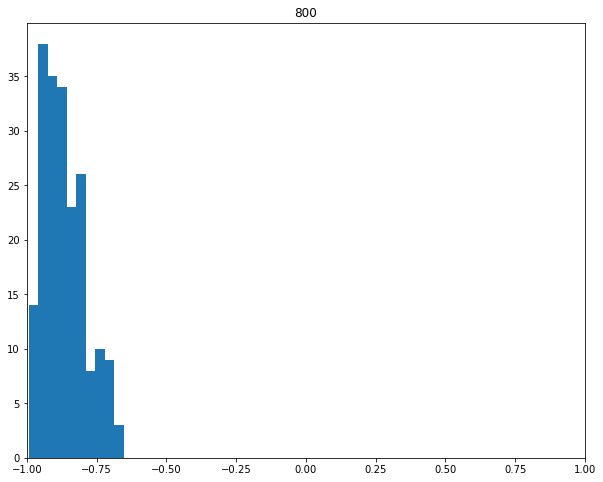

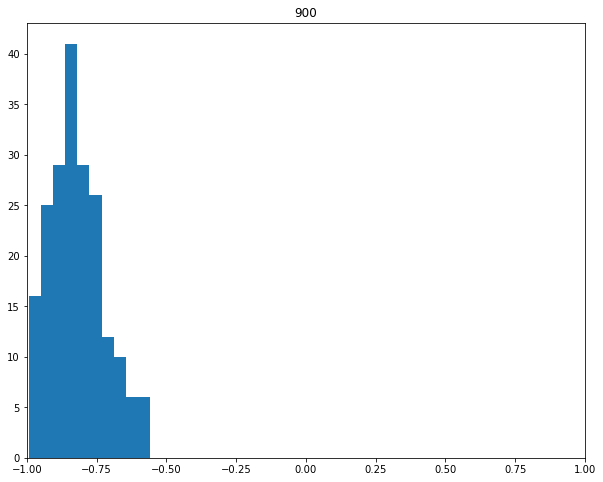

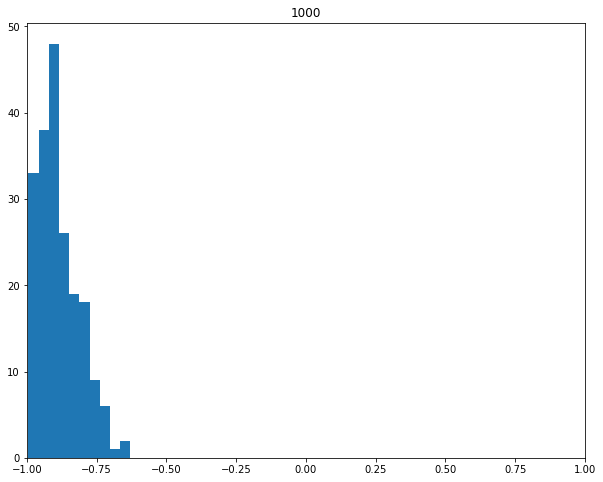

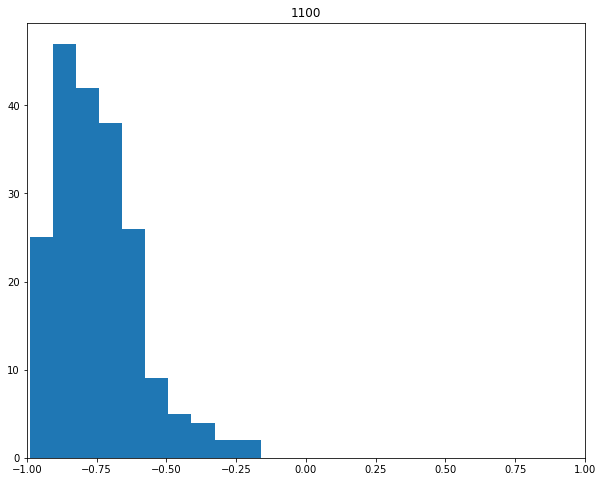

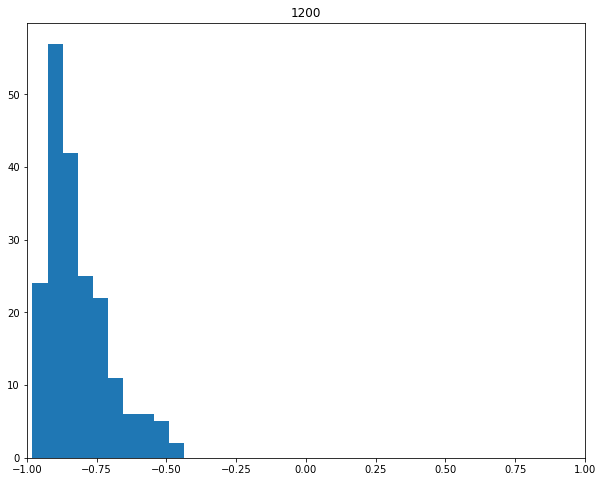

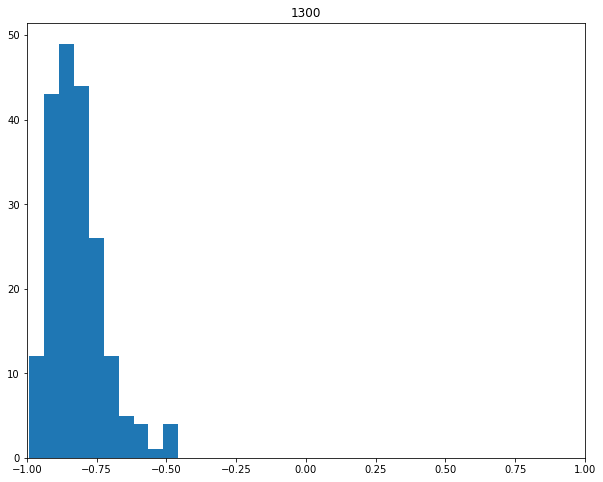

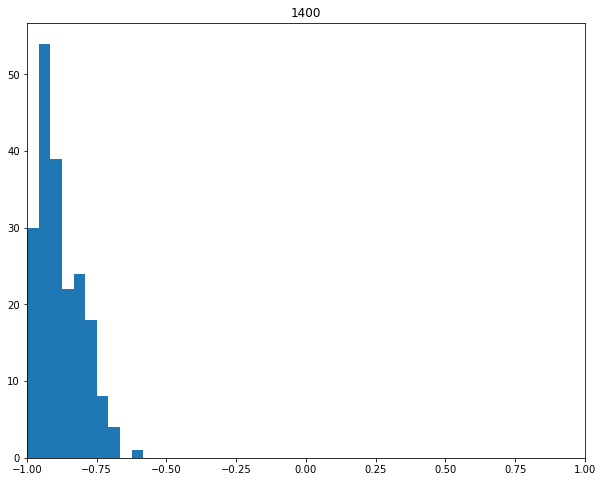

In [13]:
avg_polarization_1 = np.ones(timesteps)
modder = 100

counterr = 0
for t in range(timesteps):
#for t in range(10):

#fork here
#for t in range(1000, 1030):
    if t%modder == 0:
        counterr +=1
        
        #download particle data
        index = num_particles*t
        tmp_x = xpart[index: index+num_particles]
        tmp_y = ypart[index: index+num_particles]
        tmp_theta = thetapart[index: index+num_particles]
        
        
        #calculate the angle between the target and the dog (ONLY FOR 1 DOG)
        tmp_target_angle = np.arctan2(y_target-y_dogs[index,0], x_target-x_dogs[index,0])
        # set color info
        tmp_colors = (tmp_theta - tmp_target_angle)%(2*np.pi) #colorator(tmp_theta)
        
        avg_polarization_1[t] = np.average(tmp_theta) #np.average(tmp_colors) #np.average(tmp_theta)
        
        plt.figure(figsize = (10,8))
        plt.title(t)
        plt.hist(np.cos(tmp_theta))
        plt.xlim(-1,1)
        #plt.xlim(0, 2*np.pi)
        plt.show()
        
# plt.figure(figsize = (10,8))
# plt.plot(times, avg_polarization_1, '.')

In [30]:
!pwd

/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_new/SI_videos/driving
